In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
#Loading Data
data = pd.read_csv("./Classroom with 10th data - Sheet1.csv")

In [17]:
#Changing Column name
data.columns=['Serial_No', 'Student_Name', 'Student_Code', 'Group_Type',
       'School_Number', 'Student_Number', 'Gender',
       'Geometric_Diagrams_Score', 'Geometry_along_with_Keywords',
       'Algebraic_Equations_Score', 'Algebra_along_with_Keywords',
       'Tenth_Average_Math_and_Scie', 'Board']

In [18]:
#Removing #DIV/0 rows
data=data[data.Tenth_Average_Math_and_Scie!='#DIV/0!']
data=data[1:] #Removed first row because no info in first Row

### Total number of SSC and CBSE Students

In [19]:
(data.Board=='CBSE').values.sum()

68

In [20]:
(data.Board=='SSC').values.sum()

170

In [21]:
ind=data.isnull().values.sum(axis=1)
ind=ind!= 1
data=data[ind]

In [22]:
data.Tenth_Average_Math_and_Scie=data.Tenth_Average_Math_and_Scie.astype(float)
data.shape

(234, 13)

### Discritization of Total Math Science Percentages

In [23]:
col =np.array(234*["greter than 90"])
col[(data.Tenth_Average_Math_and_Scie>=90).values]="greter than 90"
col[(data.Tenth_Average_Math_and_Scie<90).values & (data.Tenth_Average_Math_and_Scie>=60).values]="b/w 60 and 90"
col[(data.Tenth_Average_Math_and_Scie<60).values]="below 60"

In [24]:
data["Grade"]=col
# data[data.Tenth_Average_Math_and_Scie<80 & data.Tenth_Average_Math_and_Scie>=50] = "Avrage"
# data[data.Tenth_Average_Math_and_Scie<50] = "Under_performed"

In [25]:
control_Group=data[data.Group_Type=='C']
experimental_group = data[data.Group_Type=='E']

### Scatter Plot method

In [26]:
def plot_scatter_plot(data,against,title):
    '''
    data: pd Data Frame
    against: name of column which is used to plot Scatter Plots(Correlation Plots) against Tenth_Average_Math_and_Scie
    title: Plot Title 
    '''
    plt.scatter(data.Tenth_Average_Math_and_Scie.values[data.Board=='CBSE'],
            data[against].values[data.Board=='CBSE'],label = 'CBSE')
    plt.scatter(data.Tenth_Average_Math_and_Scie.values[data.Board=='SSC'],
            data[against].values[data.Board=='SSC'],label='SSC')
    plt.legend()
    plt.title(title+ "relation with " +against)

### Total Number of SSC and CBSC in Control Group

In [27]:
print("SSC","CBSE")
(control_Group.Board=='SSC').sum(),(control_Group.Board=='CBSE').sum()

SSC CBSE


(82, 37)

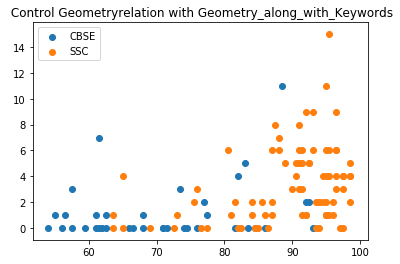

In [36]:
plot_scatter_plot(control_Group,"Geometry_along_with_Keywords"," Control Geometry")

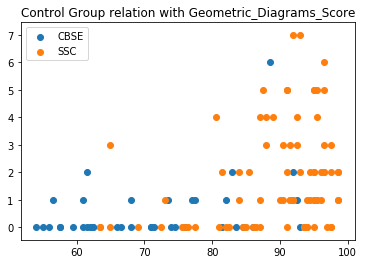

In [28]:
plot_scatter_plot(control_Group,"Geometric_Diagrams_Score","Control Group ")

In [29]:
zzz=(control_Group.Geometric_Diagrams_Score  + control_Group.Geometry_along_with_Keywords).values
bb=control_Group.Tenth_Average_Math_and_Scie.values

In [32]:
data.Geometry_along_with_Keywords.sum()

638.0

In [35]:
data.shape

(234, 14)

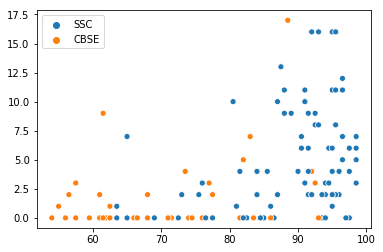

In [16]:
import seaborn as sns # include library
sns.scatterplot(x=bb, y=zzz, hue=control_Group.Board.values)

In [78]:
def get_details_according_cap(data_,clm_name,cap):
    """data: data frame
       clm_name: column name like Geometry_along_with_Keywords or Algebraic_Equations_Score 
                   in string format
       cap: Tenth_Average_Math_and_Scie < cap so cap could be like 85 | 80 |70 anything
    """
    data_sudo=data_[data_.Tenth_Average_Math_and_Scie<cap]
    number_student_below_cap  = data_sudo.shape[0]
    number_student_with_clm_feature  = (data_sudo[clm_name]>0).sum()
    mn=data_sudo[data_sudo[clm_name]>0][clm_name].mean()
    mdn=data_sudo[data_sudo[clm_name]>0][clm_name].median()
    std_dn=data_sudo[data_sudo[clm_name]>0][clm_name].std()
    dict_={"number_student_below_"+str(cap):number_student_below_cap,
            "number_student_above_Zeow_"+clm_name:number_student_with_clm_feature,
           "mean":mn,
           "median":mdn,
           "std":std_dn
          }
    return dict_

In [76]:
get_details_according_cap(control_Group,"Geometry_along_with_Keywords",85)

{'number_student_below_85': 51,
 'number_student_above_Zeow_Geometry_along_with_Keywords': 22,
 'mean': 2.409090909090909,
 'median': 2.0,
 'std': 1.790426682561368}

In [77]:
get_details_according_cap(experimental_group,"Geometry_along_with_Keywords",85)

{'number_student_below_85': 37,
 'number_student_above_Zeow_Geometry_along_with_Keywords': 19,
 'mean': 3.0526315789473686,
 'median': 2.0,
 'std': 2.4826886011053584}

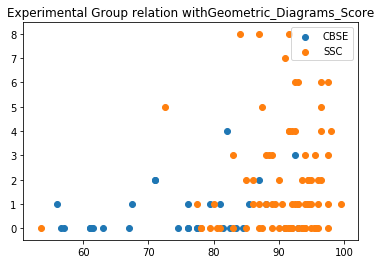

In [15]:
plot_scatter_plot(experimental_group,"Geometric_Diagrams_Score","Experimental Group ")

In [23]:
expmntl_sudo=experimental_group[experimental_group.Tenth_Average_Math_and_Scie<85]

In [30]:
(expmntl_sudo.Geometric_Diagrams_Score>0).values.sum(),(expmntl_sudo.Algebraic_Equations_Score>0).values.sum()

(13, 18)

In [35]:
Geometry_feature_expmntl=expmntl_sudo.Geometric_Diagrams_Score + expmntl_sudo.Geometry_along_with_Keywords

In [36]:
(Geometry_feature_expmntl.values>0).sum()

19

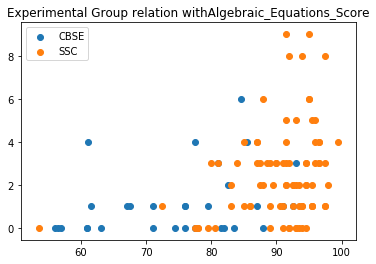

In [16]:
plot_scatter_plot(experimental_group,"Algebraic_Equations_Score","Experimental Group ")

## Corelation of Control and Experimental Group

In [118]:
control_Group.corr()

,Geometric_Diagrams_Score,Geometry_along_with_Keywords,Algebraic_Equations_Score,Algebra_along_with_Keywords,Tenth_Average_Math_and_Scie
Geometric_Diagrams_Score,1.000000,0.769662,0.497988,0.380674,0.425669
Geometry_along_with_Keywords,0.769662,1.000000,0.407019,0.376662,0.430646
Algebraic_Equations_Score,0.497988,0.407019,1.000000,0.847528,0.297429
Algebra_along_with_Keywords,0.380674,0.376662,0.847528,1.000000,0.211484
Tenth_Average_Math_and_Scie,0.425669,0.430646,0.297429,0.211484,1.000000


In [119]:
experimental_group.corr()

,Geometric_Diagrams_Score,Geometry_along_with_Keywords,Algebraic_Equations_Score,Algebra_along_with_Keywords,Tenth_Average_Math_and_Scie
Geometric_Diagrams_Score,1.000000,0.773687,0.141398,0.069965,0.252086
Geometry_along_with_Keywords,0.773687,1.000000,0.110126,0.163305,0.384789
Algebraic_Equations_Score,0.141398,0.110126,1.000000,0.731031,0.388195
Algebra_along_with_Keywords,0.069965,0.163305,0.731031,1.000000,0.457857
Tenth_Average_Math_and_Scie,0.252086,0.384789,0.388195,0.457857,1.000000


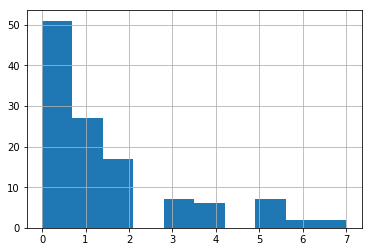

In [120]:
control_Group.Geometric_Diagrams_Score.hist()

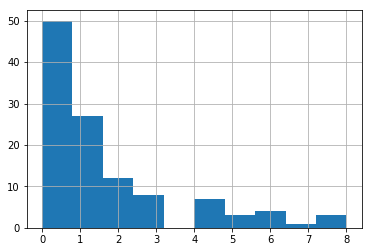

In [121]:
experimental_group.Geometric_Diagrams_Score.hist()

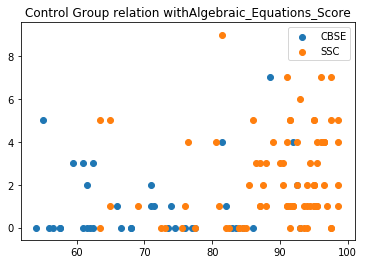

In [114]:
plot_scatter_plot(control_Group,'Algebraic_Equations_Score',"Control Group ")

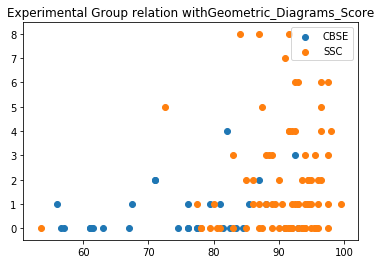

In [115]:
plot_scatter_plot(experimental_group,"Geometric_Diagrams_Score","Experimental Group ")

In [104]:
print("SSC","CBSE")
(experimental_group.Board=='SSC').sum(),(experimental_group.Board=='CBSE').sum()

SSC CBSE


(84, 31)

In [184]:
import seaborn as sns # include library

Text(0.5,1,'Control Group')

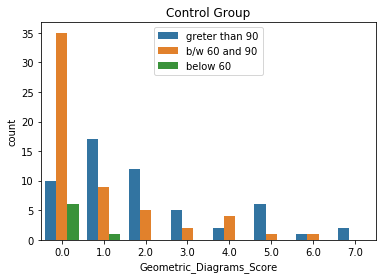

In [182]:
sns.countplot(x="Geometric_Diagrams_Score",hue = "Grade" ,data=control_Group)
plt.legend(loc='upper center')
plt.title("Control Group")

Text(0.5,1,'Experimental Group')

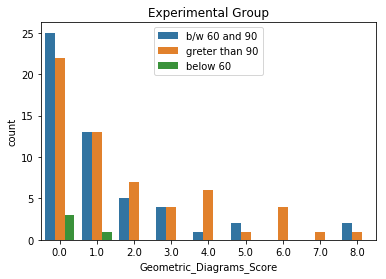

In [183]:
sns.countplot(x="Geometric_Diagrams_Score",hue = "Grade" ,data=experimental_group)
plt.legend(loc='upper center')
plt.title("Experimental Group")

139.16666666666666